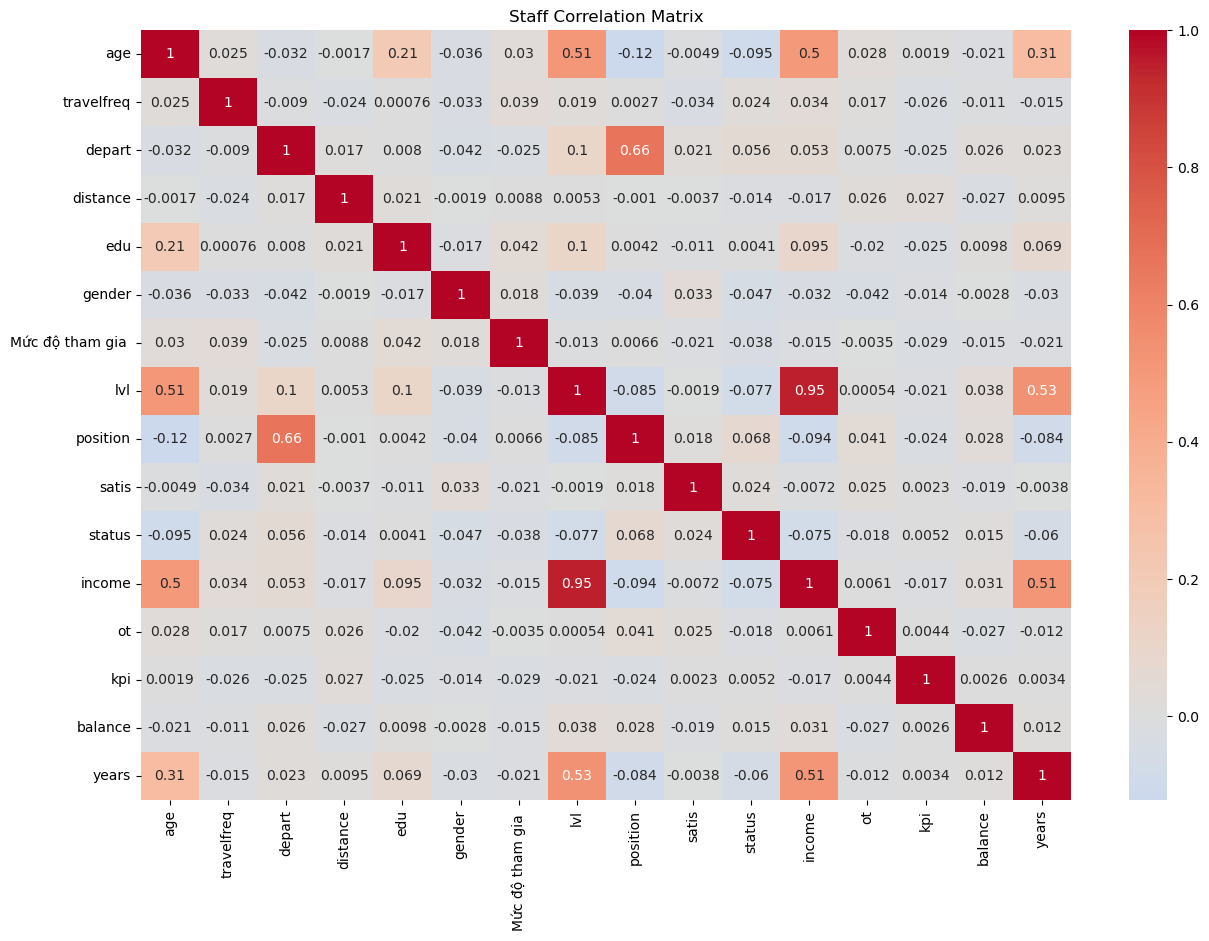

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
df = pd.read_excel('Employee-Churn-Feature.xlsx')
df.rename(columns={'Tuổi':'age','Đi du lịch (xả hơi)':'travelfreq','Đơn vị (Phòng )':'depart',
                         'Khoảng cách tới cty':'distance','Trình độ học vấn':'edu','Giới tính':'gender','Mức độ tham gia':'partlvl',
                         'Cấp bậc ( 5 : CEO:Quản lý cấp cao,....)':'lvl','Vị trí công việc':'position','Sự thỏa mãn trong cviec(môi trường, đồng nghiệp, sếp)':'satis',
                         'Tình trạng kết hôn':'status','Thu nhập':'income','OT':'ot','KPI':'kpi','Cân bằng cuộc sống':'balance','Số năm trong công ty':'years'}, inplace=True)
columns_to_encode = {'travelfreq', 'depart', 'gender', 'position', 'status', 'ot'}

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

columns_to_scale = df.columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df_corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)

# Add title and show the plot
plt.title('Staff Correlation Matrix')
plt.show()

In [3]:
def eigenvalues(df):
    """
    Calculate the eigenvalues of a square matrix represented by a DataFrame.

    Parameters:
    df (pd.DataFrame): A square DataFrame.

    Returns:
    np.ndarray: The eigenvalues of the matrix.
    """
    # Check if the input DataFrame is square
    if df.shape[0] != df.shape[1]:
        raise ValueError("Input DataFrame must represent a square matrix.")

    # Convert DataFrame to NumPy array
    matrix = df.to_numpy()

    # Calculate eigenvalues
    eigenvalues = np.linalg.eigvals(matrix)

    # Get the indices that would sort the array
    sorted_indices = np.argsort(eigenvalues)[::-1]

    return sorted_indices, eigenvalues[sorted_indices]

In [4]:
df_indices, df_eigenval = eigenvalues(df_corr)

In [5]:
for i in range(len(df_eigenval)):
    proportion = np.sum(df_eigenval[:i+1]) / len(df_eigenval) * 100
    factors = ', '.join(df.columns[df_indices[:i]].tolist())

    print(f'explained variances of {i} factors ({factors}) is {proportion:.2f}%.')

explained variances of 0 factors () is 17.34%.
explained variances of 1 factors (age) is 27.91%.
explained variances of 2 factors (age, depart) is 34.84%.
explained variances of 3 factors (age, depart, Mức độ tham gia ) is 41.58%.
explained variances of 4 factors (age, depart, Mức độ tham gia , lvl) is 48.29%.
explained variances of 5 factors (age, depart, Mức độ tham gia , lvl, position) is 54.74%.
explained variances of 6 factors (age, depart, Mức độ tham gia , lvl, position, income) is 61.09%.
explained variances of 7 factors (age, depart, Mức độ tham gia , lvl, position, income, ot) is 67.15%.
explained variances of 8 factors (age, depart, Mức độ tham gia , lvl, position, income, ot, balance) is 73.15%.
explained variances of 9 factors (age, depart, Mức độ tham gia , lvl, position, income, ot, balance, years) is 79.07%.
explained variances of 10 factors (age, depart, Mức độ tham gia , lvl, position, income, ot, balance, years, kpi) is 84.79%.
explained variances of 11 factors (age,

In [8]:
print(eigenvalues(df_corr))

(array([ 0,  2,  6,  7,  8, 11, 12, 14, 15, 13, 10,  9,  5,  4,  3,  1],
      dtype=int64), array([2.77492837, 1.6902668 , 1.10922373, 1.07873972, 1.07350278,
       1.0325067 , 1.01551775, 0.96971539, 0.95961343, 0.94749333,
       0.91530233, 0.88900671, 0.64725045, 0.53047563, 0.31958415,
       0.04687273]))


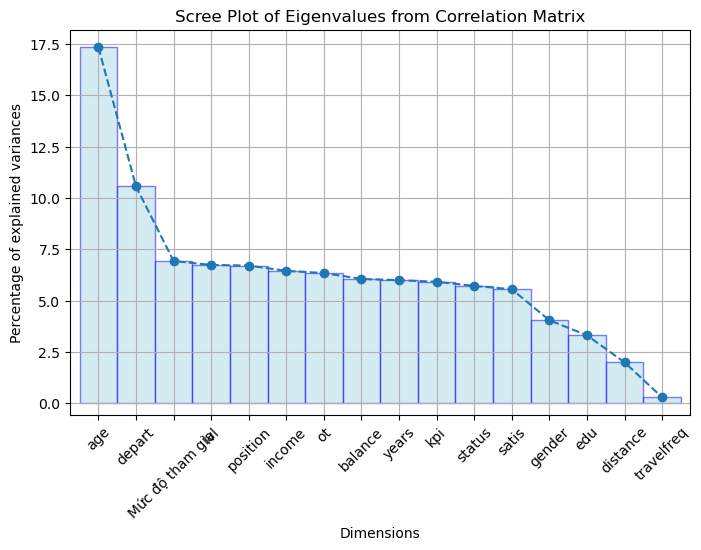

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(df_indices) + 1), np.array([df_eigenval[k] / len(df_eigenval) * 100 for k in range(len(df_eigenval))]), marker='o', linestyle='--')
plt.title('Scree Plot of Eigenvalues from Correlation Matrix')
plt.xlabel('Dimensions')
plt.ylabel('Percentage of explained variances')
plt.xticks(ticks=range(1, len(df_indices) + 1), labels=df.columns[df_indices], rotation=45)

for x in range(1, 17):
    y = df_eigenval[x-1] / len(df_eigenval)
    width = 1
    height = y * 100

    rectangle = patches.Rectangle((x - 0.5, 0), width, height, linewidth=1, edgecolor='blue', facecolor='lightblue', alpha=0.5)
    plt.gca().add_patch(rectangle)

plt.grid()
plt.show()

In [8]:
def factor_loadings_matrix(corr_matrix, n_factors):
    """
    Tính toán ma trận hệ số tải bằng phương pháp Phân tích Nhân tố Chủ yếu (PFA).

    Tham số:
    corr_matrix (pd.DataFrame): Ma trận tương quan của dữ liệu.
    n_factors (int): Số lượng nhân tố cần giữ lại.

    Trả về:
    np.ndarray: Ma trận hệ số tải.
    """
    # Bước 1: Phân rã eigenvalue
    eigenvalues, eigenvectors = np.linalg.eigh(corr_matrix)

    # Sắp xếp eigenvalue và eigenvector theo thứ tự giảm dần
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Bước 2: Giữ lại `n_factors` nhân tố dựa trên eigenvalues
    eigenvalues = eigenvalues[:n_factors]
    eigenvectors = eigenvectors[:, :n_factors]

    # Bước 3: Tính toán hệ số tải bằng cách nhân eigenvector với căn bậc hai của eigenvalues
    loadings = eigenvectors * np.sqrt(eigenvalues)

    return loadings


n_factors = 10  # Điều chỉnh theo tiêu chí lựa chọn của bạn
factor_loadings = factor_loadings_matrix(df_corr, n_factors)

# Chuyển thành DataFrame để dễ đọc
factor_loadings_df = pd.DataFrame(factor_loadings, index=df_corr.index, columns=[f'Factor{i+1}' for i in range(n_factors)])
print("Ma trận hệ số tải:\n", factor_loadings_df)

output_path = 'C:/Users/User/factor_loadings.xlsx'
factor_loadings_df.to_excel(output_path)


Ma trận hệ số tải:
                    Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
age              -0.692551  0.060418  0.151640 -0.087698  0.039750  0.066157   
travelfreq       -0.031206 -0.004405  0.467223  0.331064  0.271638 -0.311542   
depart           -0.011319 -0.906409 -0.009013 -0.067871 -0.069793 -0.001646   
distance          0.000139 -0.014463 -0.000042 -0.504153  0.216407  0.443937   
edu              -0.210927 -0.029569  0.424581 -0.091261 -0.100640  0.470086   
gender            0.058445  0.126707 -0.116289 -0.294358 -0.612028 -0.193631   
Mức độ tham gia   0.003548  0.041807  0.614101 -0.213980 -0.188149  0.001665   
lvl              -0.930621 -0.107602 -0.072232  0.032694 -0.009664 -0.057234   
position          0.172692 -0.886465  0.054087 -0.073774 -0.051841 -0.006695   
satis             0.014929 -0.048959 -0.326943 -0.279393 -0.034143 -0.343143   
status            0.143687 -0.158880 -0.093719  0.431711  0.219697  0.128387   
income           -0.

In [1]:
import numpy as np
import pandas as pd

def calculate_varimax_Q(loadings):
    """
    Tính giá trị hàm mục tiêu Varimax Q.

    Args:
        loadings (numpy.ndarray): Ma trận hệ số tải (p x m).
    
    Returns:
        float: Giá trị hàm mục tiêu Q.
    """
    p, m = loadings.shape  # p là số biến quan sát, m là số yếu tố
    Lambda_squared = loadings**2  # Tính l_{ij}^2
    
    Q = 0  # Khởi tạo giá trị Q
    for j in range(m):  # Duyệt qua từng cột (yếu tố)
        # Tổng bình phương từng tải trọng trong cột j
        sum_lij_squared = np.sum(Lambda_squared[:, j])
        # Tổng bình phương từng phần tử của l_{ij}^2 trong cột j
        sum_lij_squared_squared = np.sum(Lambda_squared[:, j]**2)
        
        # Tính giá trị đóng góp của yếu tố j vào Q
        Q_j = sum_lij_squared_squared - (1 / p) * (sum_lij_squared**2)
        Q += Q_j  # Cộng dồn giá trị của cột j vào Q
    
    # Chia tổng Q cho p để chuẩn hóa
    Q /= p
    return Q

def varimax(loadings, gamma=1.0, max_iter=100, tol=1e-6):
    """
    Thực hiện xoay Varimax để tối ưu hóa tải trọng.

    Args:
        loadings (numpy.ndarray): Ma trận tải trọng ban đầu (p x m).
        gamma (float): Thông số Varimax (thường là 1.0).
        max_iter (int): Số vòng lặp tối đa.
        tol (float): Ngưỡng hội tụ.

    Returns:
        numpy.ndarray: Ma trận tải trọng sau khi xoay.
    """
    p, m = loadings.shape
    T = np.eye(m)  # Khởi tạo ma trận xoay là ma trận đơn vị
    Q_old = calculate_varimax_Q(loadings)  # Tính Q ban đầu

    for iteration in range(max_iter):
        # Tính ma trận mục tiêu Varimax
        Lambda_rotated = np.dot(loadings, T)
        Lambda_squared = Lambda_rotated**2
        col_sums = np.sum(Lambda_squared, axis=0)
        V = np.dot(Lambda_rotated.T, Lambda_squared - (gamma / p) * col_sums)

        # Phân rã SVD để tìm ma trận xoay mới
        U, _, Vt = np.linalg.svd(V)
        T_new = np.dot(U, Vt)

        # Cập nhật ma trận xoay
        T = np.dot(T, T_new)

        # Kiểm tra điều kiện hội tụ
        Q_new = calculate_varimax_Q(np.dot(loadings, T))
        if np.abs(Q_new - Q_old) < tol:
            print(f"Varimax hội tụ sau {iteration + 1} vòng lặp. Q: {Q_new}")
            break
        Q_old = Q_new

    return np.dot(loadings, T)

# Đọc dữ liệu từ file Excel
input_path = 'C:/Users/User/factors_loadings.xlsx'
factor_loadings_df = pd.read_excel(input_path, index_col=0)
loadings = factor_loadings_df.values

# Thực hiện xoay Varimax
rotated_loadings = varimax(loadings)

# Lưu kết quả xoay ra file Excel
rotated_loadings_df = pd.DataFrame(
    rotated_loadings, 
    columns=[f'Factor{i+1}' for i in range(rotated_loadings.shape[1])],
    index=factor_loadings_df.index
)
print("Ma trận hệ số tải đã xoay:\n",rotated_loadings)
output_path = 'C:/Users/User/rotated_factor_loadings_with_Q.xlsx'
rotated_loadings_df.to_excel(output_path)



Ma trận hệ số tải đã xoay:
 [[ 6.24836117e-01 -1.43290396e-01 -1.19434964e-01  2.45520481e-01
   2.17798876e-01 -7.12864821e-02 -1.11695051e-02 -1.02601423e-01
  -2.47155221e-02 -4.99348602e-02]
 [ 3.39212818e-02 -4.43473585e-02  7.49150602e-01  3.83033759e-01
  -2.05935699e-01 -1.22989326e-01 -4.18402079e-02 -4.83164979e-02
  -8.07859525e-02 -4.72997980e-02]
 [ 7.97784339e-02  8.89862241e-01 -7.88036154e-02  8.38691526e-02
  -7.54201609e-02 -1.43761208e-01  3.33957266e-02 -1.39526800e-02
  -5.27535637e-02  3.76633652e-03]
 [-1.24057273e-02 -1.91530457e-02 -7.70910482e-02  9.85132282e-02
  -4.52684000e-02 -1.06450467e-01 -1.10932747e-02 -3.99020807e-02
  -2.12541034e-02  9.75799617e-01]
 [ 1.01248156e-01 -1.12380210e-02 -1.61721192e-01  2.65772799e-01
   8.10641311e-01 -1.45265500e-01  6.31109635e-02  4.41473681e-03
  -7.90994719e-02  2.06647024e-02]
 [-1.92022067e-01 -1.90708243e-01 -3.03447563e-01 -4.50677200e-02
  -3.39288404e-01 -5.48289552e-01  9.15421065e-02 -7.14214703e-02
  -1.